In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Number of sites
N = 40
# Forcing
F = 8
# Time range
T = 10
# Time step size
dt = 0.05
# Time steps
stepnum = int(T/dt)
# original status
x0 = np.ones(N) * F #equillibrium
x0[0] += 0.01 * F

In [21]:
#Function Lorentz96
def L96(t, x):
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d 

In [22]:
#Classical Runge-Kutta 4 (first variable: initial state, second variable: simulation time, third variable: time step size) 
def SolveL96_RK4(x0, T, dt):
    time = np.zeros(stepnum)
    xsol = np.zeros((stepnum, N))
    x = x0
    
    for t in range(stepnum):
        time[t] = t * dt
        xsol[t] = x
        k1 = dt * L96(t, x)
        k2 = dt * L96(t+0.5*dt, x+0.5*k1) 
        k3 = dt * L96(t+0.5*dt, x+0.5*k2)
        k4 = dt * L96(t+dt, x+k3)
        x += (k1 + 2*k2 + 2*k3 + k4)/6
          
    return time, xsol

In [26]:
time, xsol = SolveL96_RK4(x0, T, dt)
xsol

array([[ 4.45967046,  3.1256766 ,  4.87641643, ...,  4.40406325,
        -0.4066626 ,  3.07487776],
       [ 5.071964  ,  3.76748686,  4.92669907, ...,  5.26422928,
         1.66618623,  3.30976574],
       [ 5.4342902 ,  4.33140334,  4.63823115, ...,  5.37643109,
         3.77310705,  3.52739076],
       ...,
       [ 7.08384735, -0.13761406,  3.92413471, ..., -4.60470806,
        -2.6955796 ,  6.92260063],
       [ 7.96732803, -0.46417962,  4.24500182, ..., -3.47764863,
        -3.62146199,  5.1576201 ],
       [ 8.68439713,  0.04629868,  4.52664401, ..., -1.99063401,
        -3.90916124,  3.23072264]])

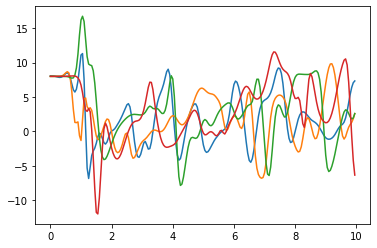

In [24]:
plt.plot(time, xsol[:,0], label = "X0")
plt.plot(time, xsol[:,10], label = "X10")
plt.plot(time, xsol[:,20], label = 'X20')
plt.plot(time, xsol[:,30], label = 'X30')

<function matplotlib.pyplot.show(close=None, block=None)>

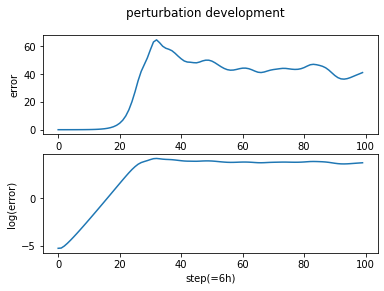

In [9]:
#　Lyapunov function
out_zoom = out[:500]
out_zoom = out_zoom[::5]
fig, ax = plt.subplots(2)
fig.suptitle('perturbation development')
ax[0].plot(out_zoom)
ax[1].plot(np.log(out_zoom))
ax[1].set_xlabel('step(=6h)')
ax[0].set_ylabel('error')
ax[1].set_ylabel('log(error)')
plt.show

In [28]:
#Hovmoller diagram

def Hov(time, xsol):

  X, T = np.meshgrid(np.arange(0, N), time)

  plt.contourf(X, T, xsol, cmap = 'Greens')
  plt.colorbar()
  plt.show()

In [34]:
F = 8 # Forcing

x0 = [F] * N #equillibrium
x0[20] += 0.001 * F

time, xsol = SolveL96_RK4(x0, 10, dt)
#time
xsol
#Hov(time, xsol)

array([[ 8.        ,  8.        ,  8.        , ...,  8.        ,
         8.        ,  8.        ],
       [ 8.        ,  8.        ,  8.        , ...,  8.        ,
         8.        ,  8.        ],
       [ 8.        ,  8.        ,  8.        , ...,  8.        ,
         8.        ,  8.        ],
       ...,
       [ 3.30194456, -2.12951878, -0.32451076, ...,  5.70869048,
         7.3719632 ,  4.51621388],
       [ 1.55520396, -2.11224356,  0.28887093, ...,  5.85873519,
         8.50482025,  3.35668477],
       [ 0.59141697, -1.71975404,  0.67838846, ...,  6.07704331,
         9.11313353,  1.42792328]])